# DATASET N.1: CHRISTIE'S AUCTION HOUSE

This dataset, sourced from [Christie's auction house](https://github.com/georgiecoetzer/What-Makes-Art-Valuable/tree/main), encompasses records from 2012 to 2022, detailing approximately 1,187 artworks. Data was gathered using Selenium for web scraping. The dataset emphasizes artist characteristics and artwork details.

**Key Variables:**
- **Artist:** Artist's name and lifespan.
- **Art Title & DoC:** Title and creation date of the artwork.
- **Price & Estimates:** Sold price, with low and high estimates.
- **Auction Details:** Auction title, closing date, and accuracy of price estimates.
- **Artwork Details:** Dimensions and currency (typically USD).
- **Artist Metrics:** Age, alive status, and popularity.


For a deeper dive, refer to the [Medium article](https://medium.com/@gcoetzer/what-makes-artvaluable-data-scraping-and-exploratory-data-visualizations-82966b218a07).


In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# URL of the dataset
url = "https://raw.githubusercontent.com/georgiecoetzer/What-Makes-Art-Valuable/main/Clean%20Data/Christies_data%20with%20popularity.csv"

dataset = pd.read_csv(url)
dataset.head()

,Artist,Birth,Death,Age,Alive?,Art Title,DoC,Currency,price,low_estimate,high_estimate,Sold,Est Accuracy,Dimentions,close date,Auction Title,closeMonth,closeYear,popularity
0,moise kisling,1891,1953,62,0,Nu,1931,USD,81250.00,40000,60000,1,1,(73 x 54 cm.),17,IMPRESSIONIST & MODERN ART DAY SALE,11,16,"22,800"
1,george edward lodge,1860,1954,94,0,Golden eagle on a branch,0,USD,2656.25,1500,2250,1,1,(34.6 x 24.7 cm.),18,"The Astor Collection from Tillypronie, Aberdee...",12,17,"4,820,000"
2,helen frankenthaler,1928,2011,83,0,Cinnamon Burn,1968,USD,663750.00,300000,500000,1,1,(304.8 x 208.2 cm.),16,POST-WAR & CONTEMPORARY MORNING SESSION,5,13,"27,900"
3,sir john alfred arnesby brown,1866,1955,89,0,"The Round Tower, Haddiscoe",0,USD,26562.50,15000,22500,1,1,(66 x 91.4 cm.),13,VICTORIAN & BRITISH IMPRESSIONIST ART,12,12,"2,130"
4,raymond pettibon,1957,0,65,1,Untitled (But come up),1987,USD,9375.00,3750,6250,1,1,(35.3 x 27.7cm.),20,First Open Online,9,18,"43,700"


# Analysis of Artwork Dataset

## Introduction

In this analysis, I explored various variables in the dataset, which contains information about artworks, including their dimensions, prices, and other relevant details. The goal was to preprocess and analyze these variables to extract meaningful insights.

**Key Variables:**
- **Artist:** Name of the artist.
- **Birth & Death:** Birth and death years of the artist.
- **Age:** Age of the artist.
- **Alive?:** 1 for alive, 0 for deceased.
- **Art Title:** Title of the artwork.
- **DoC:** Date of Creation of the artwork.
- **Currency:** Currency used, typically USD.
- **Price:** Sold price.
- **Low & High Estimate:** Estimated price range for the artwork.
- **Sold:** Whether the artwork was sold.
- **Est Accuracy:** Accuracy of the estimated price.
- **Dimensions:** Artwork's physical dimensions.
- **Close Date:** Auction's closing date.
- **Auction Title:** Title of the auction event.
- **Close Month & Year:** Month and year of auction's closing.
- **Popularity:** Artist's popularity metric.

In [3]:
# Renaming the columns
dataset.columns = dataset.columns.str.lower()  # Convert all column names to lowercase
dataset = dataset.rename(columns={
    'alive?': 'alive',
    'dimentions': 'dimension',
    'art title': 'art_title',
    'auction title': 'auct_title'
})

print(dataset.columns)

Index(['artist', 'birth', 'death', 'age', 'alive', 'art_title', 'doc',
       'currency', 'price', 'low_estimate', 'high_estimate', 'sold',
       'est accuracy', 'dimension', 'close date', 'auct_title', 'closemonth',
       'closeyear', 'popularity'],
      dtype='object')


In [4]:
dataset = dataset.drop(columns=['currency'])

In [5]:
num_observations = dataset.shape[0]
print(f"There are {num_observations} observations in the dataset.")

There are 1187 observations in the dataset.


In [6]:
print( dataset.isnull().sum())

artist           0
birth            0
death            0
age              0
alive            0
art_title        5
doc              0
price            0
low_estimate     0
high_estimate    0
sold             0
est accuracy     0
dimension        0
close date       0
auct_title       0
closemonth       0
closeyear        0
popularity       0
dtype: int64


In [7]:
# Displaying the data types of each column
print(dataset.dtypes)

artist            object
birth              int64
death              int64
age                int64
alive              int64
art_title         object
doc                int64
price            float64
low_estimate       int64
high_estimate      int64
sold               int64
est accuracy       int64
dimension         object
close date         int64
auct_title        object
closemonth         int64
closeyear          int64
popularity        object
dtype: object


## Variables in the Dataset

### 📊 Numerical Variables:
- **birth**: `int64`
- **death**: `int64`
- **age**: `int64`
- **alive**: `int64`
- **doc**: `int64`
- **price**: `float64`
- **low_estimate**: `int64`
- **high_estimate**: `int64`
- **sold**: `int64`
- **est accuracy**: `int64`
- **close date**: `int64`
- **closemonth**: `int64`
- **closeyear**: `int64`

### 📝 String (Object) Variables:
- **artist**: `object`
- **art_title**: `object`
- **currency**: `object`
- **dimension**: `object`
- **auct_title**: `object`
- **popularity**: `object`

----------------------------------------------------------------------------

# Analysis of the `price` Variable

### Descriptive Statistics

I started by examining the descriptive statistics of the `price` variable.

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
print(dataset['price'].describe())

count       1187.00
mean      431625.43
std      2580935.51
min            0.00
25%         7812.50
50%        25000.00
75%       122450.00
max     52887500.00
Name: price, dtype: float64


### Currency Conversion in the Dataset

The dataset originally contained artwork prices in various currencies. To ensure consistency and facilitate analysis, all prices were standardized to USD (U.S. Dollar) based on 2022 conversion rates.

**Steps Undertaken:**
1. **Currency Conversion Functions**: Functions were defined for each currency type (e.g., GBP, EUR, HKD) to convert values to USD.
2. **Iterative Conversion**: Each artwork's price, low estimate, and high estimate were converted to USD using the appropriate function based on its currency type.
3. **Dataset Update**: The original dataset columns were updated with the converted values, and the currency column was set to "USD" for all records.

### Distribution of Low-Priced Artworks
I identified artworks priced below $100.

In [9]:
below_100_count = dataset[dataset['price'] < 100].shape[0]
print(f"There are {below_100_count} artworks priced below $100.")

There are 7 artworks priced below $100.


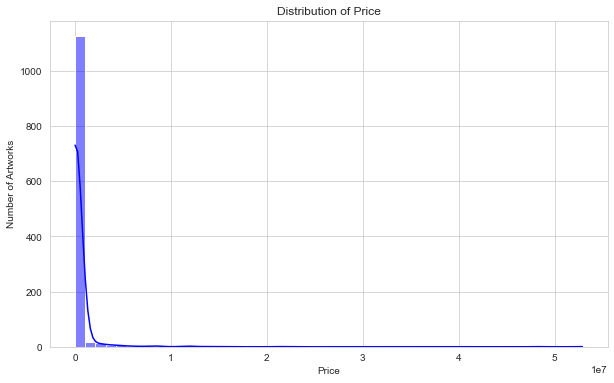

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(dataset['price'], bins=50, kde=True, color="blue")
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Number of Artworks')
plt.show()

### Distribution of 'Sold' Variable
I also checked the distribution of the sold variable.

In [11]:
sold_counts = dataset['sold'].value_counts()
print("\nDistribution for 'sold':\n", sold_counts)


Distribution for 'sold':
 1    1180
0       7
Name: sold, dtype: int64


### Analyzing Unsold Artworks
I analyzed artworks that were unsold in a particular year (e.g., 2016) and checked if they reappeared in subsequent auctions.

**Outcome**:
   - No artworks from the specified year that were unsold reappeared in the subsequent auctions covered by the dataset. This suggests that either these artworks weren't put up for auction again, were sold privately, or there are limitations in the dataset capturing this information.

In [12]:
# Step 1: Extract artworks that were unsold in a particular year, for example, 2016
unsold_artworks_2016 = dataset[(dataset['closeyear'] == 2016) & (dataset['sold'] == 0)]['art_title'].unique()

# Step 2 & 3: For each of these artworks, check if they appear in the dataset for subsequent years and retrieve their prices
reappeared_artworks = {}

for artwork in unsold_artworks_2016:
    subsequent_years = dataset[(dataset['art_title'] == artwork) & (dataset['closeyear'] > 2016)]
    if not subsequent_years.empty:
        reappeared_artworks[artwork] = subsequent_years[['closeyear', 'price']].values.tolist()

# Display the artworks that reappeared and their prices
for artwork, prices in reappeared_artworks.items():
    print(f"Artwork: {artwork}")
    for year, price in prices:
        print(f"Year: {year}, Price: ${price}")
    print("\n")

### Filtering Out Zero-Priced Artworks
To ensure the accuracy of the analysis, artworks with a price of 0 were removed.

In [13]:
dataset = dataset[dataset['price'] > 0]

Now there are 1180 observations.

### Log Transformation of Price
To achieve a more symmetric distribution, I applied a logarithmic transformation to the price variable.

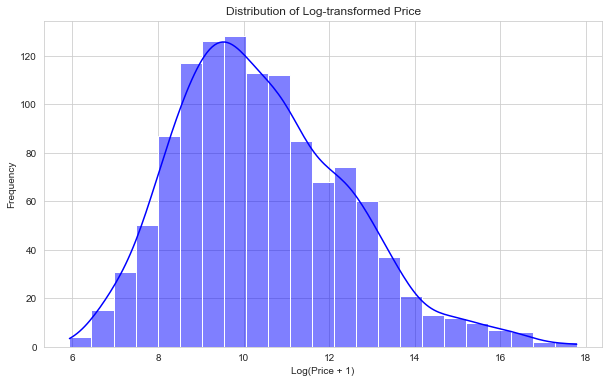

In [14]:
dataset['log_price'] = np.log(dataset['price'] + 1)
plt.figure(figsize=(10, 6))
sns.histplot(dataset['log_price'], kde=True, color="blue")
plt.title('Distribution of Log-transformed Price')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

----------------------------------------------------------------------------

# Analysis of the `art_title` Variable

## Introduction

The `art_title` variable in the dataset represents the title of each artwork. In this analysis, I explored and processed this variable to handle missing values and categorize artworks based on their titles.

### Identifying Unique Titles

I started by extracting and printing all unique titles present in the dataset.

```python
unique_titles = dataset['art_title'].unique()
for title in unique_titles:
    print(title)


### Identifying "Untitled" Artworks
Next, I identified artworks that have the word "untitled" in their title, regardless of case.

In [15]:
untitled_artworks = dataset[dataset['art_title'].str.contains('untitled', case=False, na=False)]
print(untitled_artworks['art_title'])
num_untitled_artworks = untitled_artworks.shape[0]
print(f"Number of artworks with 'untitled' in their title: {num_untitled_artworks}")

4       Untitled (But come up)
11                    Untitled
38      Untitled (Personnages)
46                    Untitled
47                Untitled #61
                 ...          
1136      Untitled (Musicians)
1143    Untitled (The Kitchen)
1148       Untitled (Palisade)
1154            each: Untitled
1161                  Untitled
Name: art_title, Length: 109, dtype: object
Number of artworks with 'untitled' in their title: 109


### Processing "Untitled" Artworks

To standardize the dataset:

1. I replaced titles containing the word "untitled" with just "untitled".
2. I replaced missing values in the `art_title` column with "untitled".

In [16]:
dataset['art_title'] = dataset['art_title'].apply(lambda x: 'untitled' if 'untitled' in str(x).lower() else x)
dataset['art_title'].fillna('untitled', inplace=True)

### Creating a Binary "Titled" Column
I created a binary column named `titled`, where artworks with a title are represented by 1 and "untitled" artworks are represented by 0.

In [17]:
dataset['titled'] = (~dataset['art_title'].str.contains('untitled', case=False)).astype(int)

In [18]:
dataset = dataset.drop(columns=['art_title'])

### Visualizing the Proportion of Titled vs. Untitled Artworks
I visualized the proportion of titled and untitled artworks using a pie chart.

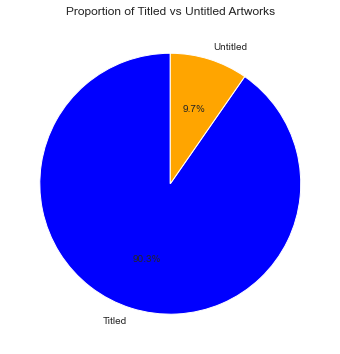

In [19]:
titled_count = dataset['titled'].sum()
untitled_count = len(dataset) - titled_count
labels = ['Titled', 'Untitled']
sizes = [titled_count, untitled_count]
colors = ['blue', 'orange']  # Specify colors for each category
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Titled vs Untitled Artworks')
plt.show()

# Processing the "Date of Creation" (`doc`) Variable

### Initial Observations:
1. I counted the number of rows where `doc` is set to 0.
2. I listed the unique values of the `doc` column to understand its distribution.

In [20]:
doc_zero_count = dataset[dataset['doc'] == 0].shape[0]
print(f"Number of rows with 'doc' equal to 0: {doc_zero_count}")

Number of rows with 'doc' equal to 0: 576


In [21]:
unique_doc_values = sorted(dataset['doc'].unique())
print(unique_doc_values)

[0, 6, 8, 9, 16, 19, 35, 44, 70, 91, 1592, 1867, 1870, 1874, 1876, 1877, 1881, 1883, 1884, 1888, 1891, 1892, 1894, 1895, 1897, 1900, 1901, 1903, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1916, 1918, 1919, 1920, 1922, 1923, 1924, 1925, 1926, 1928, 1929, 1930, 1931, 1932, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2020]


### Data Cleaning:
1. I set a threshold of 1500 and replaced any `doc` values below this threshold with 0.
2. I converted the `doc` values to strings and then to a categorical data type.

In [22]:
threshold = 1500
dataset['doc'] = dataset['doc'].apply(lambda x: 0 if x < threshold else x)

In [23]:
dataset['doc'] = dataset['doc'].astype(str)
dataset['doc'] = dataset['doc'].astype('category')

### Categorizing the "doc" Variable:

Based on the historical periods, I categorized the `doc` variable into:
- **Early Modern (1500-1800)**: Artworks from 1500 to 1800
- **Modern (1801-1900)**: Artworks from 1801 to 1900
- **Early 20th Century (1901-1945)**: Artworks from 1901 to 1945
- **Post-War to Late '90s (1946-1999)**: Artworks from 1946 to 1999
- **Early 2000s to Modern (2000-present)**: Artworks from 2000 to the present

I created a new column, `doc_category`, to store these categorized values.

In [24]:
period_categories = {
    'Modern (1500-1900)': list(range(1500, 1901)),
    'Early 20th Century (1901-1945)': list(range(1901, 1946)),
    'Post-War to Late \'90s (1946-1999)': list(range(1946, 2000)),
    'Early 2000s to Modern (2000-present)': list(range(2000, 2023))  # Update the end year if needed
}

# Categorize "doc" based on the custom categories
dataset['doc_category'] = dataset['doc'].apply(lambda x: next((cat for cat, years in period_categories.items() if int(x) in years), 'Unknown'))

# Display the first few rows of the dataset with the new "doc_category" column
dataset[['doc', 'doc_category']].head()

,doc,doc_category
0,1931,Early 20th Century (1901-1945)
1,0,Unknown
2,1968,Post-War to Late '90s (1946-1999)
3,0,Unknown
4,1987,Post-War to Late '90s (1946-1999)


### Visualization:

I dropped the original `doc` column and visualized the distribution of the `doc_category` using a pie chart to understand the proportions of artworks in each historical period.

In [25]:
#dataset = dataset.drop(columns=['doc'])

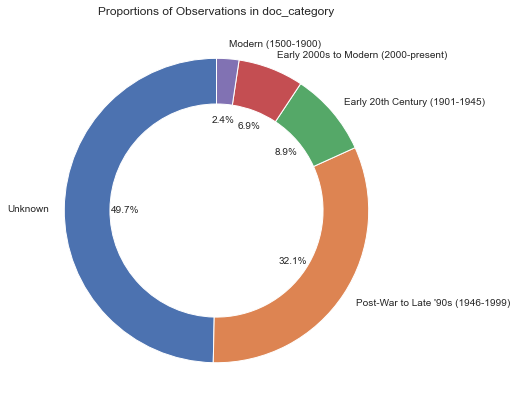

In [26]:
category_counts = dataset['doc_category'].value_counts()

sns.set_style("whitegrid")
sns.set_palette("deep")
plt.figure(figsize=(10, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
plt.title('Proportions of Observations in doc_category')
plt.show()

----------------------------------------------------------------------------

# Processing the `popularity` Variable

### Initial Observations:
- I displayed the descriptive statistics for the `popularity` column.

In [27]:
print(dataset['popularity'].describe())

count        1180
unique        598
top       470,000
freq           78
Name: popularity, dtype: object


### Data Cleaning:
1. I removed commas from the `popularity` column and converted it to a numeric data type.
2. I displayed the updated descriptive statistics for the cleaned `popularity` column.

In [28]:
dataset['popularity'] = dataset['popularity'].str.replace(',', '', regex=True).astype(float)
print(dataset['popularity'].describe())

count       1180.00
mean     1037956.08
std      4297927.31
min         2130.00
25%        43400.00
50%       115000.00
75%       470000.00
max     76100000.00
Name: popularity, dtype: float64


In [29]:
dataset['popularity'] = pd.to_numeric(dataset['popularity'], errors='coerce')

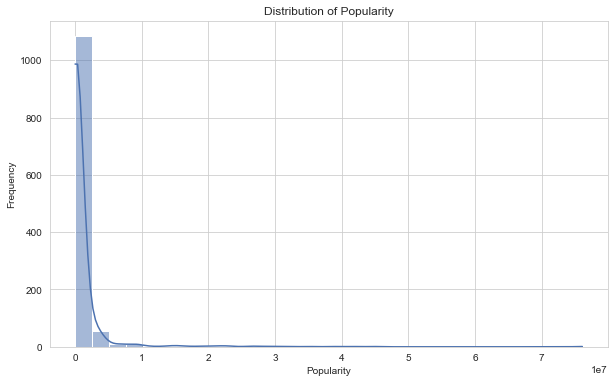

In [30]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset['popularity'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

In [31]:
dataset['log_pop'] = np.log(dataset['popularity'])

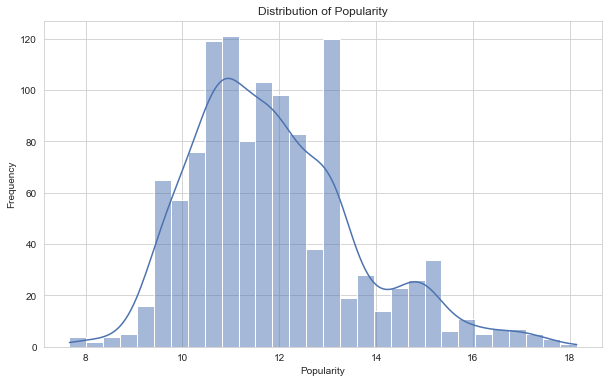

In [32]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(dataset['log_pop'], bins=30, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

### Feature Scaling:

- I first transformed the `popularity` variable using a logarithmic transformation, resulting in a new column named `log_pop`. Subsequently, I applied min-max scaling to the log_pop values to rescale them into a range of 0 to 10. The column containing these rescaled values is named pop_scaled.

In [33]:
min_log_pop = dataset['log_pop'].min()
max_log_pop = dataset['log_pop'].max()

dataset['scaled_log_pop'] = 10 * (dataset['log_pop'] - min_log_pop) / (max_log_pop - min_log_pop)
print(dataset['scaled_log_pop'].describe())

count   1180.00
mean       4.02
std        1.64
min        0.00
25%        2.88
50%        3.80
75%        5.15
max       10.00
Name: scaled_log_pop, dtype: float64


### Categorizing the "popularity" Variable:
Based on the scaled values, I categorized the `popularity` into:
- **Low**: Values up to 0.05 (25th percentile).
- **Medium**: Values between 0.05 and 0.61 (25th to 75th percentile).
- **High**: Values above 0.61 (75th percentile).

I created a new column, `pop_category`, to store these categorized values.

In [34]:
'''
def categorize_popularity(value):
    if value <= 2.88:
        return 'Low'
    elif 2.88 < value <= 5.15:
        return 'Medium'
    else:
        return 'High'

dataset['pop_category'] = dataset['scaled_log_pop'].apply(categorize_popularity)
'''


"\ndef categorize_popularity(value):\n    if value <= 2.88:\n        return 'Low'\n    elif 2.88 < value <= 5.15:\n        return 'Medium'\n    else:\n        return 'High'\n\ndataset['pop_category'] = dataset['scaled_log_pop'].apply(categorize_popularity)\n"

### Visualization:
I visualized the distribution of the `pop_category` using a bar chart to understand the number of artworks in each popularity category.

In [35]:
'''
category_counts = dataset['pop_category'].value_counts()

sns.set_style("whitegrid")
sns.set_palette("husl", n_colors=len(dataset['pop_category'].unique()))
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Number of Observations for Each Category in pop_category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Number of Observations', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
'''

'\ncategory_counts = dataset[\'pop_category\'].value_counts()\n\nsns.set_style("whitegrid")\nsns.set_palette("husl", n_colors=len(dataset[\'pop_category\'].unique()))\nplt.figure(figsize=(12, 8))\nsns.barplot(x=category_counts.index, y=category_counts.values)\nplt.title(\'Number of Observations for Each Category in pop_category\', fontsize=16)\nplt.xlabel(\'Category\', fontsize=14)\nplt.ylabel(\'Number of Observations\', fontsize=14)\nplt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()\n'

----------------------------------------------------------------------------

# Analysis of the `dimension` Variable

## Introduction

I delved into the `dimension` variable in the dataset, which represents the dimensions of artworks. This variable was initially a string containing both measurements and units of measure (cm, mm, in). My goal was to process this variable to extract meaningful information about the sizes of artworks and categorize them based on their area.


In [ ]:
unique_dimensions = dataset['dimension'].unique()
num_unique_dimensions = len(unique_dimensions)
unique_dimensions, num_unique_dimensions

## Preprocessing

1. **Creating a Copy**: 
   - I made a copy of the `dimension` column, naming it `dimension_copy`, to preserve the original data.

2. **Extracting Units of Measure**: 
   - I extracted the units of measure (cm, mm, in) from the `dimension_copy` column and stored them in a new column named `unit`.

3. **Converting Dimensions**: 
   - I converted all dimensions to centimeters (cm) using the following conversions:
     - 1 inch = 2.54 cm
     - 1 mm = 0.1 cm

In [37]:
dataset['dimension_copy'] = dataset['dimension']
# Extract units from the dimension_copy column
dataset['unit'] = dataset['dimension_copy'].str.extract(r'(cm|mm|in.)')
print(dataset[['dimension_copy', 'unit']])

                    dimension_copy unit
0                    (73 x 54 cm.)   cm
1                (34.6 x 24.7 cm.)   cm
2              (304.8 x 208.2 cm.)   cm
3                  (66 x 91.4 cm.)   cm
4                 (35.3 x 27.7cm.)   cm
...                            ...  ...
1182             (15.5 x 24.1 cm.)   cm
1183                             0  NaN
1184                             0  NaN
1185             (55.6 x 45.9 cm.)   cm
1186  (365 x 248mm to 403 x 277mm)   mm

[1180 rows x 2 columns]


In [38]:
# Check the unique values in the 'unit' column
unique_units = dataset['unit'].unique()
print(unique_units)

['cm' nan 'mm' 'in.' 'in ' 'inc' 'ing']


In [39]:
# Replace all variations of inches with "in"
dataset['unit'] = dataset['unit'].replace(['in.', 'inc', 'ing', 'in '], 'in')
dataset['unit'].fillna('unknown', inplace=True)

# Check the updated unique values in the 'unit' column
updated_unique_units = dataset['unit'].unique()
print(updated_unique_units)

['cm' 'unknown' 'mm' 'in']


In [40]:
def convert_to_cm(value, unit):
    # Convert inches to cm
    if unit == 'in':
        return value * 2.54
    # Convert mm to cm
    elif unit == 'mm':
        return value * 0.1
    # If already in cm or unknown, return the value
    else:
        return value

In [41]:
# Extract height and width from the dimension_copy column
dataset['height'] = dataset['dimension_copy'].str.extract(r'(\d+\.?\d*)')[0].astype(float)
dataset['width'] = dataset['dimension_copy'].str.extract(r'x (\d+\.?\d*)')[0].astype(float)

In [42]:
# Convert height and width to cm based on the unit
dataset['height_cm'] = dataset.apply(lambda row: convert_to_cm(row['height'], row['unit']), axis=1)
dataset['width_cm'] = dataset.apply(lambda row: convert_to_cm(row['width'], row['unit']), axis=1)

In [43]:
# Calculate the area
dataset['area_cm2'] = dataset['height_cm'] * dataset['width_cm']

In [44]:
# Display the dataset with the converted values and calculated area
print(dataset[['dimension_copy', 'unit', 'height_cm', 'width_cm', 'area_cm2']])

                    dimension_copy     unit  height_cm  width_cm  area_cm2
0                    (73 x 54 cm.)       cm      73.00     54.00   3942.00
1                (34.6 x 24.7 cm.)       cm      34.60     24.70    854.62
2              (304.8 x 208.2 cm.)       cm     304.80    208.20  63459.36
3                  (66 x 91.4 cm.)       cm      66.00     91.40   6032.40
4                 (35.3 x 27.7cm.)       cm      35.30     27.70    977.81
...                            ...      ...        ...       ...       ...
1182             (15.5 x 24.1 cm.)       cm      15.50     24.10    373.55
1183                             0  unknown       0.00       NaN       NaN
1184                             0  unknown       0.00       NaN       NaN
1185             (55.6 x 45.9 cm.)       cm      55.60     45.90   2552.04
1186  (365 x 248mm to 403 x 277mm)       mm      36.50     24.80    905.20

[1180 rows x 5 columns]


In [45]:
# Calculate descriptive statistics for 'area_cm2'
descriptive_stats = dataset['area_cm2'].describe()
print(descriptive_stats)

count     831.00
mean     7002.93
std     12596.48
min        64.00
25%       871.86
50%      2535.24
75%      6795.19
max     92407.00
Name: area_cm2, dtype: float64


## Categorizing Artworks

Drawing from insights on [The Artling](https://theartling.com/en/artzine/artwork-choose-right-size-space/), I identified the following categories for artwork sizes:

- **Small**: 18-24 inches
- **Medium**: 25-32 inches
- **Large**: 33-40 inches
- **Oversized**: 41 inches or larger

However, to tailor these categories to this dataset, I adopted a hybrid approach, blending the thresholds proposed by the website with the percentiles from our dataset. This ensured that the thresholds reflected both external definitions and the actual distribution of artwork sizes in our dataset.

In [46]:
# Define the hybrid thresholds
small_threshold = (3715.6 + 871.86) / 2
medium_threshold = (6607.8 + 2535.24) / 2
large_threshold = (10323.4 + 6795.19) / 2

# Categorize artworks based on the hybrid thresholds
def categorize_artwork(area):
    if area <= small_threshold:
        return 'Small'
    elif area <= medium_threshold:
        return 'Medium'
    elif area <= large_threshold:
        return 'Large'
    else:
        return 'Oversized'

dataset['art_category'] = dataset['area_cm2'].apply(categorize_artwork)

# Display the first few rows of the dataset to see the new 'art_category' column
dataset.head()

,artist,birth,death,age,alive,doc,price,low_estimate,high_estimate,sold,...,log_pop,scaled_log_pop,dimension_copy,unit,height,width,height_cm,width_cm,area_cm2,art_category
0,moise kisling,1891,1953,62,0,1931,81250.00,40000,60000,1,...,10.03,2.26,(73 x 54 cm.),cm,73.00,54.00,73.00,54.00,3942.00,Medium
1,george edward lodge,1860,1954,94,0,0,2656.25,1500,2250,1,...,15.39,7.37,(34.6 x 24.7 cm.),cm,34.60,24.70,34.60,24.70,854.62,Small
2,helen frankenthaler,1928,2011,83,0,1968,663750.00,300000,500000,1,...,10.24,2.45,(304.8 x 208.2 cm.),cm,304.80,208.20,304.80,208.20,63459.36,Oversized
3,sir john alfred arnesby brown,1866,1955,89,0,0,26562.50,15000,22500,1,...,7.66,0.00,(66 x 91.4 cm.),cm,66.00,91.40,66.00,91.40,6032.40,Large
4,raymond pettibon,1957,0,65,1,1987,9375.00,3750,6250,1,...,10.69,2.88,(35.3 x 27.7cm.),cm,35.30,27.70,35.30,27.70,977.81,Small


## Results

After applying the hybrid approach, I added a new column to the dataset, `art_category`, which classifies each artwork into one of the above-mentioned categories based on its area in cm^2.

----------------------------------------------------------------------------

# Estimating the Accuracy of Artwork Pricing:

The `Est Accuracy` variable was derived to understand how the actual selling price of an artwork compares to its pre-auction estimated price range. The categorization is as follows:

- **Over Estimate (1)**: The artwork sold for a price greater than or equal to its high estimate.
- **Under Estimate (-1)**: The artwork sold for a price less than or equal to its low estimate.
- **Within Estimate (0)**: The artwork sold for a price that falls within its estimated range (between low and high estimates, inclusive).


In [47]:
def categorize_estimate(value):
    if value == 1:
        return "Over Estimate"
    elif value == -1:
        return "Under Estimate"
    else:
        return "Within Range"
    
dataset['est_category'] = dataset['est accuracy'].apply(categorize_estimate)

## Visualizing Estimate Categories

To visualize the distribution of these categories, I used a countplot to show the number of artworks falling into each category. This provides insights into how accurately artworks are estimated in the market.

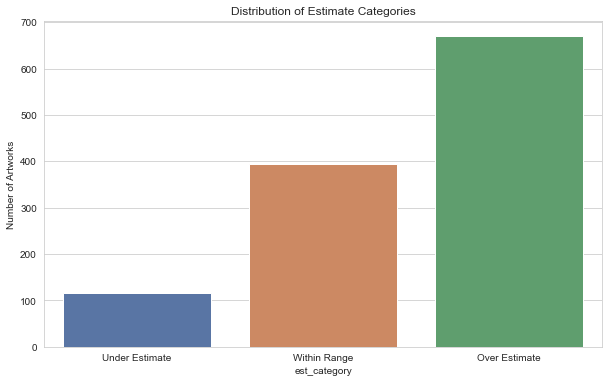

In [48]:
estimate_counts = dataset['est_category'].value_counts()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='est_category', order=['Under Estimate', 'Within Range', 'Over Estimate'])
plt.title('Distribution of Estimate Categories')
plt.ylabel('Number of Artworks')
plt.show()

# Artist Demographics
Moving on to artist demographics, I analyzed various attributes, including birth and death years, age, and whether the artist is currently alive. Understanding these characteristics helps us gain insights into the artists themselves.

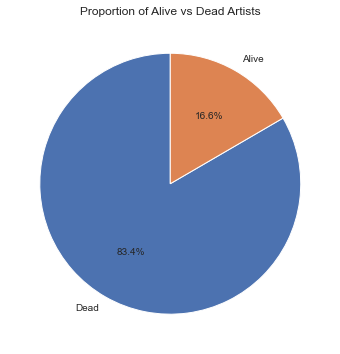

In [49]:
alive_counts = dataset['alive'].value_counts()

labels = ['Dead', 'Alive'] if 0 in alive_counts.index else ['Alive', 'Dead']
plt.figure(figsize=(8, 6))
plt.pie(alive_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Alive vs Dead Artists')
plt.show()

## Transformation of `closeyear` 
I transformed the `closeyear` values to ensure consistency in the dataset. This transformation allows for better analysis and interpretation of the data.

In [50]:
unique_closeyear = dataset['closeyear'].unique()
unique_closeyear

array([  16,   17,   13,   12,   18,   15,   22,   19,   14,   20,   21,
       2019, 2020, 2021], dtype=int64)

In [51]:
# Transform the 'closeyear' values
def transform_year(year):
    if year < 100:  # Assuming no year is below 2000 in the dataset
        return 2000 + year
    return year

dataset['closeyear'] = dataset['closeyear'].apply(transform_year)
unique_transformed_closeyear = dataset['closeyear'].unique()
unique_transformed_closeyear

array([2016, 2017, 2013, 2012, 2018, 2015, 2022, 2019, 2014, 2020, 2021],
      dtype=int64)

## Artist Mortality Analysis
### `Years Since Death`

To understand the impact of an artist's death on artwork pricing, I calculated the number of years since each artist's death. This metric can help us determine whether there is any correlation between an artist's passing and the prices of their artworks.

In [52]:
dataset['years_since_death'] = dataset.apply(lambda row: row['closeyear'] - row['death'] if row['alive'] == 0 else 0, axis=1)

### `Premature Death Identification`

I also identified cases of premature artist deaths based on a defined threshold age. This analysis can provide insights into the potential impact of an artist's lifespan on their career and artwork pricing.

In [53]:
threshold_age_for_premature_death = 60
dataset['premature_death'] = dataset.apply(lambda row: 1 if row['age'] <= threshold_age_for_premature_death and row['alive'] == 0 else 0, axis=1)
dataset[['artist', 'alive', 'years_since_death', 'premature_death']]

,artist,alive,years_since_death,premature_death
0,moise kisling,0,63,0
1,george edward lodge,0,63,0
2,helen frankenthaler,0,2,0
3,sir john alfred arnesby brown,0,57,0
4,raymond pettibon,1,0,0
...,...,...,...,...
1182,walter richard sickert,0,70,0
1183,robert delaunay,0,80,1
1184,henry moore,0,32,0
1185,walter gay,0,81,0


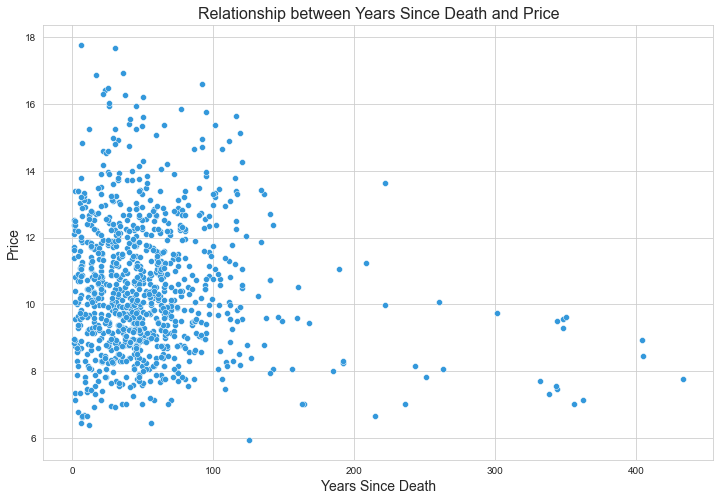

In [54]:
filtered_dataset = dataset[dataset['years_since_death'] > 0]
# Define a custom color palette
custom_palette = ["#3498db"]  
sns.set_style("whitegrid")
sns.set_palette(custom_palette)
plt.figure(figsize=(12, 8))
sns.scatterplot(x=filtered_dataset['years_since_death'], y=filtered_dataset['log_price'])
plt.title('Relationship between Years Since Death and Price', fontsize=16)
plt.xlabel('Years Since Death', fontsize=14)
plt.ylabel('Price', fontsize=14)

# Display the plot
plt.show()

# `closemonth` Variable

### Transformation of `closemonth` Variable

The `closemonth` variable, which originally represented the month in which an artwork was sold, has been transformed into a new categorical variable called `season`. This transformation was based on the typical seasonal divisions:

- **Winter**: December, January, February
- **Spring**: March, April, May
- **Summer**: June, July, August
- **Fall**: September, October, November

The new `season` column now represents the season in which each artwork was sold.

In [55]:
dataset['closemonth']

0       11
1       12
2        5
3       12
4        9
        ..
1182    12
1183     4
1184     2
1185    11
1186    10
Name: closemonth, Length: 1180, dtype: int64

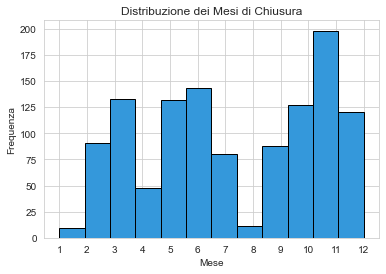

In [56]:
dataset['closemonth'].hist(bins=12, edgecolor='black')
plt.title('Distribuzione dei Mesi di Chiusura')
plt.xlabel('Mese')
plt.ylabel('Frequenza')
plt.xticks(range(1, 13))
plt.show()

In [57]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

dataset['season'] = dataset['closemonth'].apply(month_to_season)

In [58]:
dataset = dataset.drop(columns=['closemonth'])

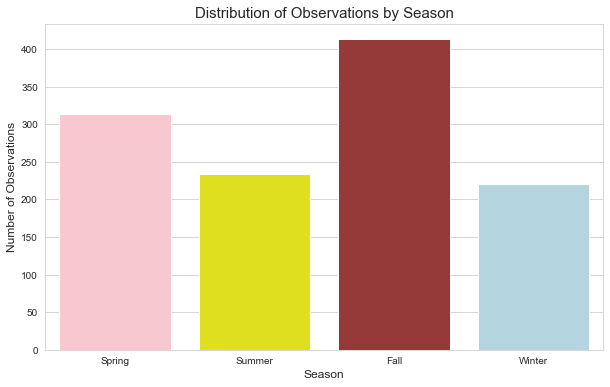

In [59]:
# Define the custom color palette
custom_palette = {
    'Spring': 'pink',
    'Summer': 'yellow',
    'Fall': 'brown',
    'Winter': 'lightblue'
}


plt.figure(figsize=(10, 6))
sns.countplot(data=dataset, x='season', order=['Spring', 'Summer', 'Fall', 'Winter'], palette=custom_palette)
plt.title('Distribution of Observations by Season', fontsize=15)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Observations', fontsize=12)
plt.show()

### Dropping Unnecessary Columns

Initially, we removed columns that are not required for our analysis.

In [60]:
dataset

,artist,birth,death,age,alive,doc,price,low_estimate,high_estimate,sold,...,height,width,height_cm,width_cm,area_cm2,art_category,est_category,years_since_death,premature_death,season
0,moise kisling,1891,1953,62,0,1931,81250.00,40000,60000,1,...,73.00,54.00,73.00,54.00,3942.00,Medium,Over Estimate,63,0,Fall
1,george edward lodge,1860,1954,94,0,0,2656.25,1500,2250,1,...,34.60,24.70,34.60,24.70,854.62,Small,Over Estimate,63,0,Winter
2,helen frankenthaler,1928,2011,83,0,1968,663750.00,300000,500000,1,...,304.80,208.20,304.80,208.20,63459.36,Oversized,Over Estimate,2,0,Spring
3,sir john alfred arnesby brown,1866,1955,89,0,0,26562.50,15000,22500,1,...,66.00,91.40,66.00,91.40,6032.40,Large,Over Estimate,57,0,Winter
4,raymond pettibon,1957,0,65,1,1987,9375.00,3750,6250,1,...,35.30,27.70,35.30,27.70,977.81,Small,Over Estimate,0,0,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,walter richard sickert,1860,1942,82,0,0,25000.00,25000,37500,1,...,15.50,24.10,15.50,24.10,373.55,Small,Under Estimate,70,0,Winter
1183,robert delaunay,1885,1941,56,0,1922,651000.00,525000,840000,1,...,0.00,NaN,0.00,NaN,NaN,Oversized,Within Range,80,1,Spring
1184,henry moore,1898,1986,88,0,1975,985937.50,625000,875000,1,...,0.00,NaN,0.00,NaN,NaN,Oversized,Over Estimate,32,0,Winter
1185,walter gay,1856,1937,81,0,0,8125.00,4000,6000,1,...,55.60,45.90,55.60,45.90,2552.04,Medium,Over Estimate,81,0,Fall


In [61]:
columns_to_drop = ['log_pop', 'popularity','artist', 'birth', 'death', 'age', 'sold','auct_title','dimension_copy', 'doc', 'dimension', 'close date', 'closeyear', 'price', 'low_estimate', 'high_estimate', 'unit', 'height', 'width', 'height_cm', 'width_cm', 'area_cm2', 'est accuracy']
dataset = dataset.drop(columns=columns_to_drop)

## CORRELATION MAP

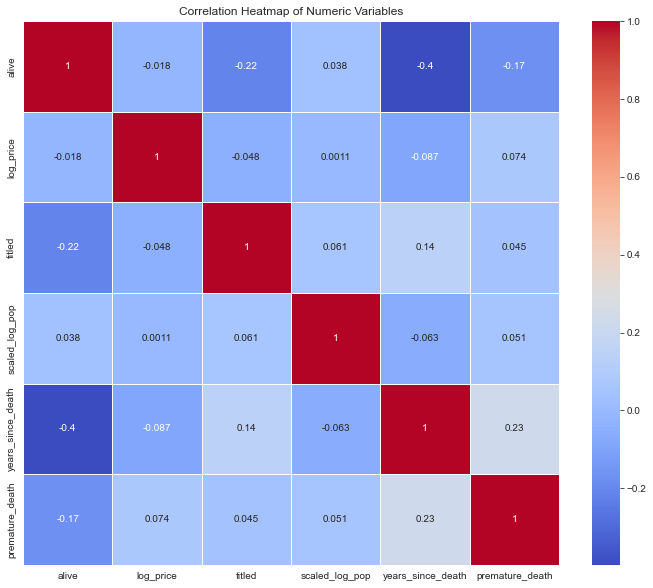

In [62]:
numeric_columns = dataset.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [77]:
print(correlation_matrix)

                   alive  log_price  titled  scaled_log_pop  \
alive               1.00      -0.02   -0.22            0.04   
log_price          -0.02       1.00   -0.05            0.00   
titled             -0.22      -0.05    1.00            0.06   
scaled_log_pop      0.04       0.00    0.06            1.00   
years_since_death  -0.40      -0.09    0.14           -0.06   
premature_death    -0.17       0.07    0.05            0.05   

                   years_since_death  premature_death  
alive                          -0.40            -0.17  
log_price                      -0.09             0.07  
titled                          0.14             0.05  
scaled_log_pop                 -0.06             0.05  
years_since_death               1.00             0.23  
premature_death                 0.23             1.00  


### VIF Analysis

The Variance Inflation Factor (VIF) is a measure used to detect the presence of multicollinearity in regression analyses. A VIF value greater than 10 is typically considered to indicate high multicollinearity.

In [63]:
numeric_columns_const = sm.add_constant(numeric_columns)
vif_data = pd.DataFrame()
vif_data['Variable'] = numeric_columns_const.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_columns_const.values, i) for i in range(numeric_columns_const.shape[1])]
print(vif_data)

            Variable   VIF
0              const 48.82
1              alive  1.24
2          log_price  1.02
3             titled  1.06
4     scaled_log_pop  1.01
5  years_since_death  1.25
6    premature_death  1.08


From the provided VIF values:
- All variables have VIF values well below 10, suggesting that there is no significant multicollinearity among the predictors.
- The highest VIF value is for the `const` term, which is expected as it represents the intercept.
- Other variables like `alive`, `years_since_death`, and `premature_death` have slightly higher VIF values compared to the rest, but they are still well within acceptable limits.

Overall, the predictors in the model seem to be free from severe multicollinearity issues.


# Category Analysis and Dummy Variable Creation

In this section, I'll explore the distribution of observations across each category and create dummy variables to represent these categories in our model.

## Counting Observations for Each Category

First, let's see how many items we have in each category.

In [64]:
doc_counts = dataset['doc_category'].value_counts()
#pop_counts = dataset['pop_category'].value_counts()
art_counts = dataset['art_category'].value_counts()
season_counts = dataset['season'].value_counts()
est_counts = dataset['est_category'].value_counts()

print("\nObservations for doc_category:\n", doc_counts)
#print("\nObservations for pop_category:\n", pop_counts)
print("\nObservations for art_category:\n", art_counts)
print("\nObservations for season:\n", season_counts)
print("\nObservations for est_category:\n", est_counts)


Observations for doc_category:
 Unknown                                 586
Post-War to Late '90s (1946-1999)       379
Early 20th Century (1901-1945)          105
Early 2000s to Modern (2000-present)     82
Modern (1500-1900)                       28
Name: doc_category, dtype: int64

Observations for art_category:
 Oversized    501
Small        403
Medium       152
Large        124
Name: art_category, dtype: int64

Observations for season:
 Fall      413
Spring    313
Summer    234
Winter    220
Name: season, dtype: int64

Observations for est_category:
 Over Estimate     670
Within Range      394
Under Estimate    116
Name: est_category, dtype: int64


In [65]:
# Create dummy variables for 'doc_category' and drop the 'Unknown' category
doc_category_dummies = pd.get_dummies(dataset['doc_category'], prefix='doc_category')
doc_category_dummies = doc_category_dummies.drop('doc_category_Unknown', axis=1)

# Create dummy variables for 'pop_category' and drop the 'Medium' category
#pop_category_dummies = pd.get_dummies(dataset['pop_category'], prefix='pop_category')
#pop_category_dummies = pop_category_dummies.drop('pop_category_Medium', axis=1)

# Create dummy variables for 'art_category' and drop the 'Oversized' category
art_category_dummies = pd.get_dummies(dataset['art_category'], prefix='art_category')
art_category_dummies = art_category_dummies.drop('art_category_Oversized', axis=1)

# Create dummy variables for the 'season' column
season_dummies = pd.get_dummies(dataset['season'], prefix='season')
season_dummies = season_dummies.drop('season_Fall', axis=1)

# Create dummy variables for the 'season' column
est_category_dummies = pd.get_dummies(dataset['est_category'], prefix='est_category')
est_category_dummies = est_category_dummies.drop('est_category_Within Range', axis=1)

# Concatenate the dummy variables to the original dataset
dataset = pd.concat([dataset, doc_category_dummies, art_category_dummies, season_dummies, est_category_dummies ], axis=1) #pop_category_dummies

# Drop the original categorical columns
dataset = dataset.drop(['doc_category', 'art_category', 'season', 'est_category'], axis=1) #, 'pop_category'

In [66]:
dataset

,alive,log_price,titled,scaled_log_pop,years_since_death,premature_death,doc_category_Early 2000s to Modern (2000-present),doc_category_Early 20th Century (1901-1945),doc_category_Modern (1500-1900),doc_category_Post-War to Late '90s (1946-1999),art_category_Large,art_category_Medium,art_category_Small,season_Spring,season_Summer,season_Winter,est_category_Over Estimate,est_category_Under Estimate
0,0,11.31,1,2.26,63,0,0,1,0,0,0,1,0,0,0,0,1,0
1,0,7.89,1,7.37,63,0,0,0,0,0,0,0,1,0,0,1,1,0
2,0,13.41,1,2.45,2,0,0,0,0,1,0,0,0,1,0,0,1,0
3,0,10.19,1,0.00,57,0,0,0,0,0,1,0,0,0,0,1,1,0
4,1,9.15,0,2.88,0,0,0,0,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1182,0,10.13,1,3.24,70,0,0,0,0,0,0,0,1,0,0,1,0,1
1183,0,13.39,1,3.86,80,1,0,1,0,0,0,0,0,1,0,0,0,0
1184,0,13.80,1,3.86,32,0,0,0,0,1,0,0,0,0,0,1,1,0
1185,0,9.00,1,7.03,81,0,0,0,0,0,0,1,0,0,0,0,1,0


In [67]:
X = dataset.drop(columns=['log_price'])
y = dataset['log_price']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [69]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train_const).fit()

In [70]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     13.67
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.52e-35
Time:                        22:10:29   Log-Likelihood:                -2133.0
No. Observations:                1062   AIC:                             4302.
Df Residuals:                    1044   BIC:                             4391.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

# Regression Analysis and Correlation with `log_price`

## Regression Analysis

## Regression Analysis

I performed a regression analysis to understand the relationship between the logarithm of the artwork's price (`log_price`) and various independent variables. The results are as follows:

- **R-squared**: The R-squared value is 0.182, which means that approximately 18.2% of the variability in `log_price` is explained by the model. This is a relatively low value, suggesting that there might be other factors not included in the model that influence the price of artworks.

- **Significant Variables**: 
  - `alive`, `years_since_death`, `premature_death`, and several categories from `doc_category` and `est_category` have p-values less than 0.05, indicating that they are statistically significant predictors of `log_price`.
  - Notably, `est_category_Under Estimate` has a strong negative coefficient, suggesting artworks that are under-estimated tend to have a lower `log_price`.

- **Insignificant Variables**: 
  - Variables like `titled`, `scaled_log_pop`, `art_category_Medium`, `season_Spring`, `season_Summer`, `season_Winter`, and `est_category_Over Estimate` have p-values greater than 0.05, indicating that they might not be significant predictors for `log_price` in this model.

## Pearson Correlation with `log_price`

The bar chart below displays the Pearson correlation coefficients between `log_price` and the independent variables. This provides a measure of the linear relationship between the target variable and each predictor.

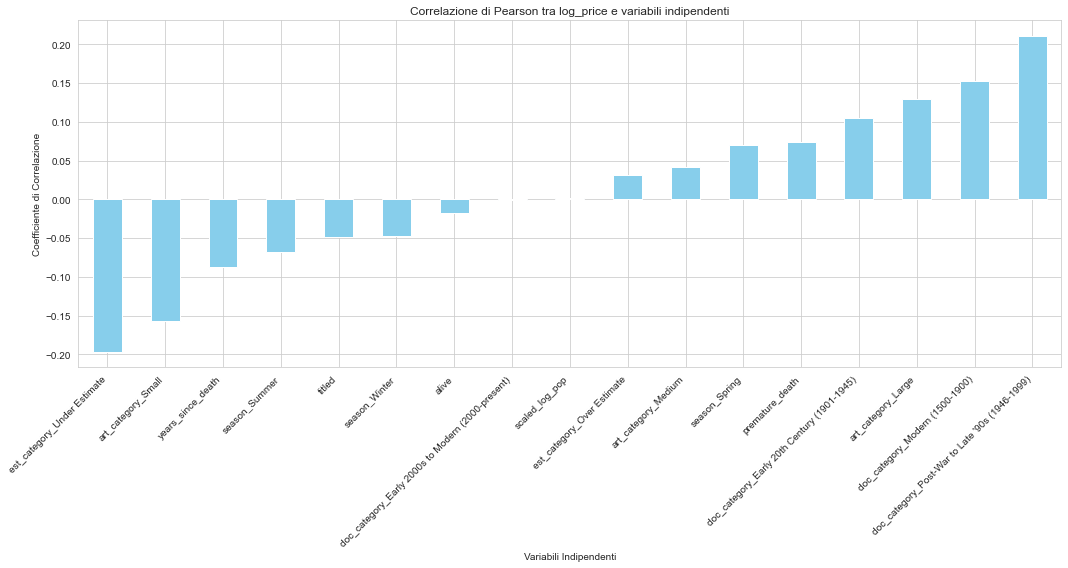

In [71]:
correlation = dataset.corr()['log_price'].drop('log_price')

plt.figure(figsize=(15, 8))
correlation.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlazione di Pearson tra log_price e variabili indipendenti')
plt.ylabel('Coefficiente di Correlazione')
plt.xlabel('Variabili Indipendenti')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Model Evaluation

After fitting the OLS regression model, it's essential to evaluate its performance on the test dataset. The following sections provide insights into the model's accuracy and the distribution of residuals.

## Root Mean Squared Error (RMSE) and R-squared

- **RMSE**: This metric provides the average error made by the model in predicting the `log_price`. A lower RMSE indicates a better fit to the data.
- **R-squared**: Represents the proportion of the variance in the dependent variable (`log_price`) that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating a better fit.

In [72]:
y_pred = model.predict(X_test_const)

In [73]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

RMSE: 1.7207221971695352
R-squared: 0.22147523142957903


### Actual vs. Predicted Log Price

The scatter plot below compares the actual log_price values from the test dataset with the predicted values from the model. The red line represents the line of perfect prediction. Points close to this line indicate accurate predictions.

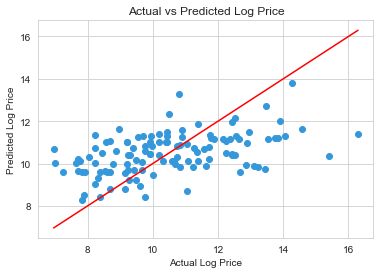

In [74]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Actual vs Predicted Log Price')
plt.show()

### Residuals Distribution

Residuals are the differences between the actual and predicted values. Analyzing the distribution of residuals can provide insights into the model's assumptions and potential areas of improvement.

The histogram below shows the distribution of residuals. Ideally, the residuals should be normally distributed around zero, indicating that the model's errors are random and not biased.

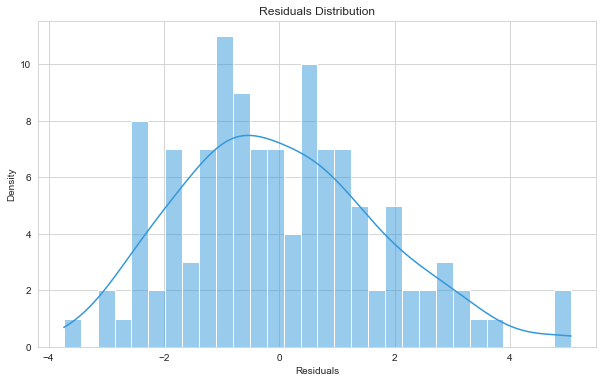

In [75]:
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

In [76]:
coefficients = model.params
# compute impact on log_price
price_impact = (np.exp(coefficients) - 1)*100
print(price_impact)

const                                               3264321.44
alive                                                   -32.82
titled                                                  -10.22
scaled_log_pop                                           -0.56
years_since_death                                        -0.25
premature_death                                          50.50
doc_category_Early 2000s to Modern (2000-present)       123.91
doc_category_Early 20th Century (1901-1945)             247.99
doc_category_Modern (1500-1900)                        1329.84
doc_category_Post-War to Late '90s (1946-1999)          191.65
art_category_Large                                       75.52
art_category_Medium                                      17.87
art_category_Small                                      -26.29
season_Spring                                            23.06
season_Summer                                           -23.50
season_Winter                                          

https://onlinelibrary.wiley.com/doi/10.1111/eufm.12348 reference for price impact

# OLS Regression Analysis

## Summary

The OLS regression analysis was conducted to understand the relationship between the logarithm of the artwork's price (`log_price`) and various independent variables. The updated results of the analysis are presented below.

## Regression Results

| Variable                                               | Coefficient | Standard Error | Price Impact (%) |
|--------------------------------------------------------|-------------|----------------|------------------|
| **alive**                                              | -0.3978     | 0.192          | -32.89           |
| titled                                                 | -0.1079     | 0.196          | -10.25           |
| scaled_log_pop                                         | -0.0056     | 0.034          | -0.56            |
| years_since_death                                      | -0.0025     | 0.001          | -0.25            |
| **premature_death**                                    | 0.4088      | 0.177          | 50.44            |
| **doc_category_Early 2000s to Modern (2000-present)**  | 0.8061      | 0.277          | 123.97           |
| **doc_category_Early 20th Century (1901-1945)**        | 1.2470      | 0.204          | 246.89           |
| **doc_category_Modern (1500-1900)**                    | 2.6601      | 0.395          | 1330.23          |
| **doc_category_Post-War to Late '90s (1946-1999)**     | 1.0704      | 0.141          | 191.63           |
| **art_category_Large**                                 | 0.5626      | 0.195          | 75.54            |
| art_category_Medium                                    | 0.1644      | 0.179          | 17.87            |
| **art_category_Small**                                 | -0.3051     | 0.135          | -26.15           |
| season_Spring                                          | 0.2075      | 0.145          | 23.05            |
| season_Summer                                          | -0.2679     | 0.159          | -23.72           |
| season_Winter                                          | -0.0403     | 0.163          | -3.93            |
| est_category_Over Estimate                             | -0.1927     | 0.122          | -17.54           |
| **est_category_Under Estimate**                        | -1.4232     | 0.203          | -75.89           |

**Note**: Variables in bold are statistically significant at the 5% level.

## Conclusions

From the regression results, we can observe:

1. The variables highlighted in bold are statistically significant at the 5% level, indicating they have a meaningful impact on the `log_price` of artworks.
2. Variables such as `doc_category_Modern (1500-1900)` have a strong positive impact on the price, suggesting artworks from this period are likely to fetch a higher price.
3. Conversely, variables like `est_category_Under Estimate` have a strong negative impact, indicating that artworks that are under-estimated tend to have a lower `log_price`.
4. Some variables, like `titled` and `season_Winter`, have coefficients that are not statistically significant, suggesting they might not be strong predictors of `log_price` in this model.

This analysis provides valuable insights into the factors influencing the price of artworks and can guide pricing strategies and investment decisions in the art market.